In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance

In [30]:
def ggen():
    comp = np.random.randint(3,8)
    print(comp)
    val = []
    xx = []
    yy = []
    for i in range(0,comp):
        x = np.random.randint(50,250)
        xx.append(x)
        y = np.random.randint(50)
        yy.append(y)
        value = np.random.normal(loc=x,scale=y,size=10000)
        val.append(list(value))
    sns.distplot(val)
    #plt.show()
    return val, comp, xx, yy

6
5


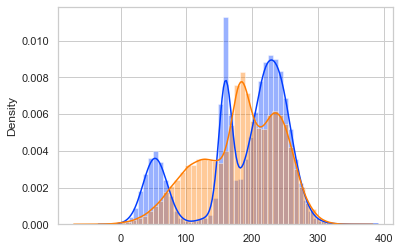

In [31]:
q1, x1 , mean1, std1 = ggen()
q2, x2 , mean2, std2 = ggen()

In [32]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=175,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
q1 = np.concatenate((value1,value2,value3))

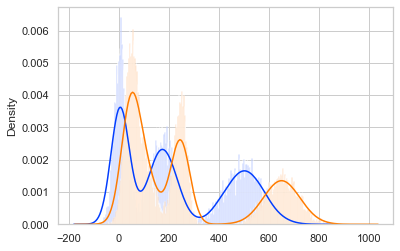

In [33]:
value1 = np.random.normal(loc=90,scale=45,size=10000)
value2 =  np.random.normal(loc=245,scale=25,size=10000)
value3 =  np.random.normal(loc=650,scale=69,size=10000)
value4 =  np.random.normal(loc=45,scale=23,size=10000)
q2 = np.concatenate((value1,value2,value3,value4))
sns.distplot(q1,bins=1000)
sns.distplot(q2,bins=1000)
plt.show()

In [34]:

lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q1 = np.asarray(q1)
        q1 =q1.reshape(-1,1)
        gmm.fit(q1)
        bic.append(gmm.bic(q1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq1 = gmm
            
lowest_bic = np.infty
bic = []
n_components_range = range(1, 8)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        q2 = np.asarray(q2)
        q2 =q2.reshape(-1,1)
        gmm.fit(q2)
        bic.append(gmm.bic(q2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmmq2 = gmm
    

In [35]:
print(best_gmmq1.get_params())
print(best_gmmq2.get_params())
print(best_gmmq1.weights_)
print(best_gmmq2.weights_)
print(best_gmmq1.means_)
#print(mean1)
print(best_gmmq2.means_)
#print(mean2)
print(best_gmmq1.covariances_)
print(best_gmmq2.covariances_)

{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
{'covariance_type': 'diag', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 4, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[0.33348235 0.33380875 0.33270889]
[0.32991802 0.24999332 0.25602104 0.16406761]
[[500.92397106]
 [  4.78789632]
 [174.92780266]]
[[ 44.97019608]
 [650.65806251]
 [243.76544307]
 [107.45010874]]
[[5713.78933643]
 [ 637.49022668]
 [2497.67654112]]
[[ 607.64576266]
 [4685.58228192]
 [ 685.66628639]
 [1020.78802961]]


<AxesSubplot:ylabel='Density'>

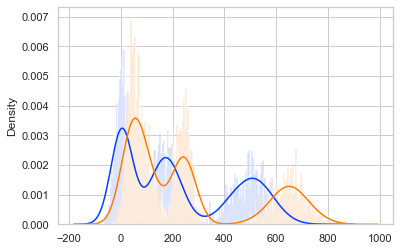

In [36]:
r1,_=best_gmmq1.sample(10000)
sns.distplot(r1,bins=1000)
r2,_=best_gmmq2.sample(10000)
sns.distplot(r2,bins=1000)

In [37]:
print(best_gmmq1.score(r1))
best_gmmq2.score(r2)

-6.3021367693795645


-6.146502743783553

In [38]:
x = dict(zip(best_gmmq1.weights_,best_gmmq1.means_))
od1 = collections.OrderedDict(sorted(x.items(),reverse=True))
od1

OrderedDict([(0.333808753184112, array([4.78789632])),
             (0.33348235385730496, array([500.92397106])),
             (0.33270889295857337, array([174.92780266]))])

In [39]:
y = dict(zip(best_gmmq2.weights_,best_gmmq2.means_))
od2 = collections.OrderedDict(sorted(y.items(),reverse=True))
od2

OrderedDict([(0.3299180185639232, array([44.97019608])),
             (0.25602104252956004, array([243.76544307])),
             (0.24999332442975603, array([650.65806251])),
             (0.16406761447674806, array([107.45010874]))])

In [40]:
minsize=min(len(od1),len(od2))
od1 = dict(od1).items()
od1 = list(od1)[:minsize]
od2 = dict(od2).items()
od2 = list(od2)[:minsize]
od2

[(0.3299180185639232, array([44.97019608])),
 (0.25602104252956004, array([243.76544307])),
 (0.24999332442975603, array([650.65806251]))]

In [41]:
od1

[(0.333808753184112, array([4.78789632])),
 (0.33348235385730496, array([500.92397106])),
 (0.33270889295857337, array([174.92780266]))]

In [42]:
odw=[]
odm=[]
for i in range(len(od1)):
    odw.append(abs(od1[i][0] - od2[i][0]))
    odm.append(abs(od1[i][1][0] - od2[i][1][0]))
    

In [43]:
odw

[0.003890734620188796, 0.07746131132774492, 0.08271556852881734]

In [44]:
odm

[40.18229975869491, 257.15852799431724, 475.730259847692]

Manhattan

In [45]:
dmm = list(zip(odw,odm))
dmm

[(0.003890734620188796, 40.18229975869491),
 (0.07746131132774492, 257.15852799431724),
 (0.08271556852881734, 475.730259847692)]

In [46]:
odw=[]
odm=[]
for i in range(len(od1)):
    odw.append(np.sqrt((od1[i][0] - od2[i][0])**2))
    odm.append(np.sqrt((od1[i][1][0] - od2[i][1][0])**2))


Euclidean

In [47]:
dme = list(zip(odw,odm))
dme

[(0.003890734620188796, 40.18229975869491),
 (0.07746131132774492, 257.15852799431724),
 (0.08271556852881734, 475.730259847692)]

In [48]:
odd1 = []
odd2 = []
for i in range(minsize):
    odd1.append(od1[i][0] * od1[i][1][0])
    odd2.append(od2[i][0] * od2[i][1][0])
odd1 = np.asarray(odd1)
odd2 = np.asarray(odd2)
odd2

array([ 14.83647799,  62.40908287, 162.66017211])

In [49]:
odd1

array([  1.5982417 , 167.04930497,  58.20003557])

Manhattan

In [50]:
distm = abs(odd1-odd2)
distm

array([ 13.23823628, 104.64022211, 104.46013654])

Euclidean

In [51]:
dist = np.sqrt(abs((odd1)**2 - (odd2)**2))
dist

array([ 14.75014246, 154.95346614, 151.89169645])